In [75]:
# Import the necessary libraries
import numpy as np

from ikpy.chain import Chain
from ikpy.utils import plot


# Optional: Support for 3D plotting in the notebook.
# Feel free to turn this off if you don't need it
# %matplotlib widget

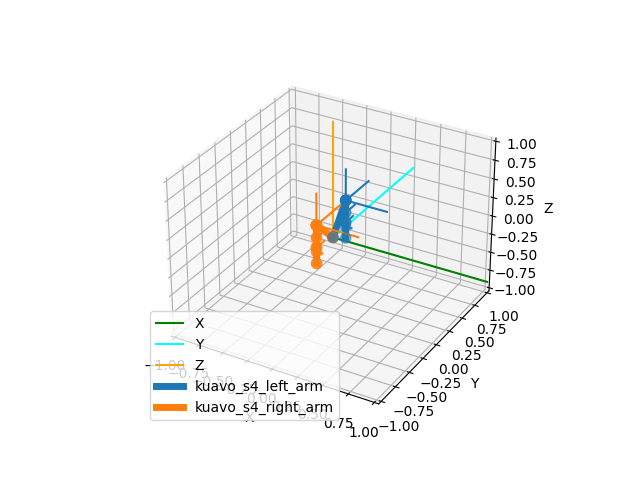

In [76]:
# Robot Import and Setup
kuavo_left_arm_chain = Chain.from_json_file("../assets/kuavo_s4/urdf/kuavo_s4_left_arm.json")
kuavo_right_arm_chain = Chain.from_json_file("../assets/kuavo_s4/urdf/kuavo_s4_right_arm.json")


from mpl_toolkits.mplot3d import Axes3D
fig, ax = plot.init_3d_figure()
kuavo_left_arm_chain.plot([0] * (len(kuavo_left_arm_chain)), ax)
kuavo_right_arm_chain.plot([0] * (len(kuavo_right_arm_chain)), ax)

ax.legend()

In [77]:
kuavo_right_arm_chain

Kinematic chain name=kuavo_s4_right_arm links=['Base link', 'r_arm_pitch', 'r_arm_roll', 'r_arm_yaw', 'r_forearm_pitch', 'r_hand_yaw', 'r_hand_pitch', 'r_hand_roll', 'r_hand_end_virtual', 'last_joint'] active_links=[False  True  True  True  True  True  True  True False False]

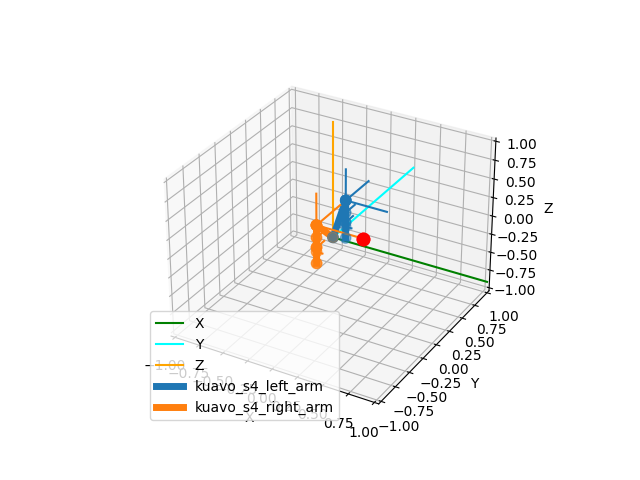

In [42]:
fig, ax = plot.init_3d_figure();

# Place a target directly in front of the robot, roughly in the centre 
target = [0.3, 0.1, 0.1]

# Carry out the inverse kinematics
ik_left_arm = kuavo_left_arm_chain.inverse_kinematics(target)
# Plot to show the result (and prove success!)
kuavo_left_arm_chain.plot(ik_left_arm, ax, target=target)

ik_right_arm = kuavo_right_arm_chain.inverse_kinematics(target)
kuavo_right_arm_chain.plot(ik_right_arm, ax, target=target)


# Comment out if the graph's key gets in the way.
ax.legend()

In [79]:
target = [0.3, 0.1, 0.2]
kuavo_right_arm_chain.inverse_kinematics(target)

array([ 0.00000000e+00, -1.14923479e-10,  1.42632734e-11, -1.88127412e-27,
       -1.38998268e-10,  1.62612632e-28, -2.40952965e-11,  1.94766960e-11,
        0.00000000e+00,  0.00000000e+00])

In [80]:
kuavo_right_arm_chain.active_links_mask

array([False,  True,  True,  True,  True,  True,  True,  True, False,
       False])

In [81]:
kuavo_right_arm_chain.base_elements

['torso',
 'r_arm_pitch',
 'r_arm_pitch',
 'r_arm_roll',
 'r_arm_roll',
 'r_arm_yaw',
 'r_arm_yaw',
 'r_forearm_pitch',
 'r_forearm_pitch',
 'r_hand_yaw',
 'r_hand_yaw',
 'r_hand_pitch',
 'r_hand_pitch',
 'r_hand_roll',
 'r_hand_roll']

In [53]:
len(kuavo_left_arm_chain.links)

10

In [74]:
c = 0
for i in kuavo_left_arm_chain.links:
    print('-'*10, c)
    c = c + 1
    print(i)

---------- 0
Link name=Base link bounds=(-inf, inf)
---------- 1
URDF Link l_arm_pitch :
    Type : revolute
    Bounds : (-3.14159, 0.523599)
    Origin Translation : [-0.01754758  0.2547      0.3245    ]
    Origin Orientation : [0. 0. 0.]
    Rotation : [0. 1. 0.]
    Translation: None
---------- 2
URDF Link l_arm_roll :
    Type : revolute
    Bounds : (-0.349066, 2.0944)
    Origin Translation : [0. 0. 0.]
    Origin Orientation : [0. 0. 0.]
    Rotation : [1. 0. 0.]
    Translation: None
---------- 3
URDF Link l_arm_yaw :
    Type : revolute
    Bounds : (-1.5708, 1.5708)
    Origin Translation : [0. 0. 0.]
    Origin Orientation : [0. 0. 0.]
    Rotation : [0. 0. 1.]
    Translation: None
---------- 4
URDF Link l_forearm_pitch :
    Type : revolute
    Bounds : (-1.5708, 0.0)
    Origin Translation : [ 0.      0.     -0.1636]
    Origin Orientation : [0. 0. 0.]
    Rotation : [0. 1. 0.]
    Translation: None
---------- 5
URDF Link l_hand_yaw :
    Type : revolute
    Bounds : (-

In [12]:
target_position = [ 0.1, -0.2, 0.1]
print("The angles of each joints are : ", my_chain.inverse_kinematics(target_position))


The angles of each joints are :  [-3.29306217e-16  7.44778738e-01 -1.34028729e+00  4.00924127e-01
 -8.30999613e-01  1.02448782e+00  0.00000000e+00]


In [13]:
real_frame = my_chain.forward_kinematics(my_chain.inverse_kinematics(target_position))
print("Computed position vector : %s, original position vector : %s" % (real_frame[:3, 3], target_position))

Computed position vector : [ 0.09999993 -0.19999986  0.09999998], original position vector : [0.1, -0.2, 0.1]


(-0.1, 0.1)

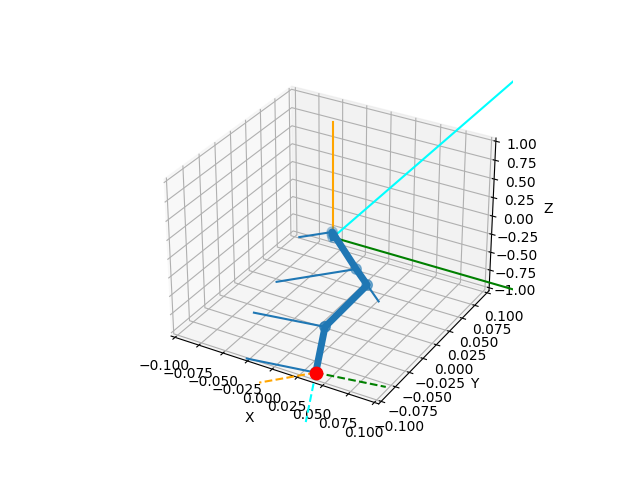

In [16]:
# Optional: support for 3D plotting in the NB
# If there is a matplotlib error, uncomment the next line, and comment the line below it.
# %matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt
fig, ax = plot_utils.init_3d_figure()
my_chain.plot(my_chain.inverse_kinematics(target_position), ax, target=target_position)
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)